# Praktikum 2

## Teil II

### 2.

In [1]:
from hdbcli import dbapi
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt

hana_ip = '52.17.42.3'
connection = dbapi.connect(hana_ip, 39015, 'SYSTEM', 'Glorp2018!')
cursor = connection.cursor()

In [3]:
def getAverageSentenceLength():
    cursor.execute('SELECT CMPLID, TA_TOKEN, TA_SENTENCE FROM "SYSTEM"."$TA_CDESCRIND" ORDER BY CMPLID, TA_SENTENCE;')

    totalLength = 0
    documentID = -1

    SentenceNumber = -1
    countSentence = 0
    for row in cursor:
        if (row[0] != documentID):
            documentID = row[0]
            SentenceNumber = row[2]
            countSentence = countSentence + 1

        if(row[2] != SentenceNumber):
            SentenceNumber = row[2]
            countSentence = countSentence + 1

        # print(row[1])
        totalLength = totalLength + len(row[1])

    print("Number Sentences:")
    print(countSentence)
    print("Average Length:")
    print(totalLength/countSentence)

### 3.

In [73]:
def generateWordCloud(sqlcommand):
    cursor.execute(sqlcommand)

    tmpDict = {}
    for row in cursor:
        tmpval = row[1]
        tmpDict[row[0]] = tmpval
        #print(row[0] + ", " + str(row[1]))

    wordcloud = WordCloud(width=480, height=480, margin=0).generate_from_frequencies(tmpDict)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

def generateBarChart(sqlcommand):
    import pandas as pd
    cursor.execute(sqlcommand)
    df = pd.DataFrame(cursor, columns=['Token','Count'])
    #x_labels = list(df['Token'])
    df.set_index("Token",drop=True,inplace=True)
    ax = df.plot.bar(y='Count', rot=75, figsize=(20,10))

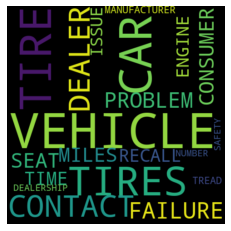

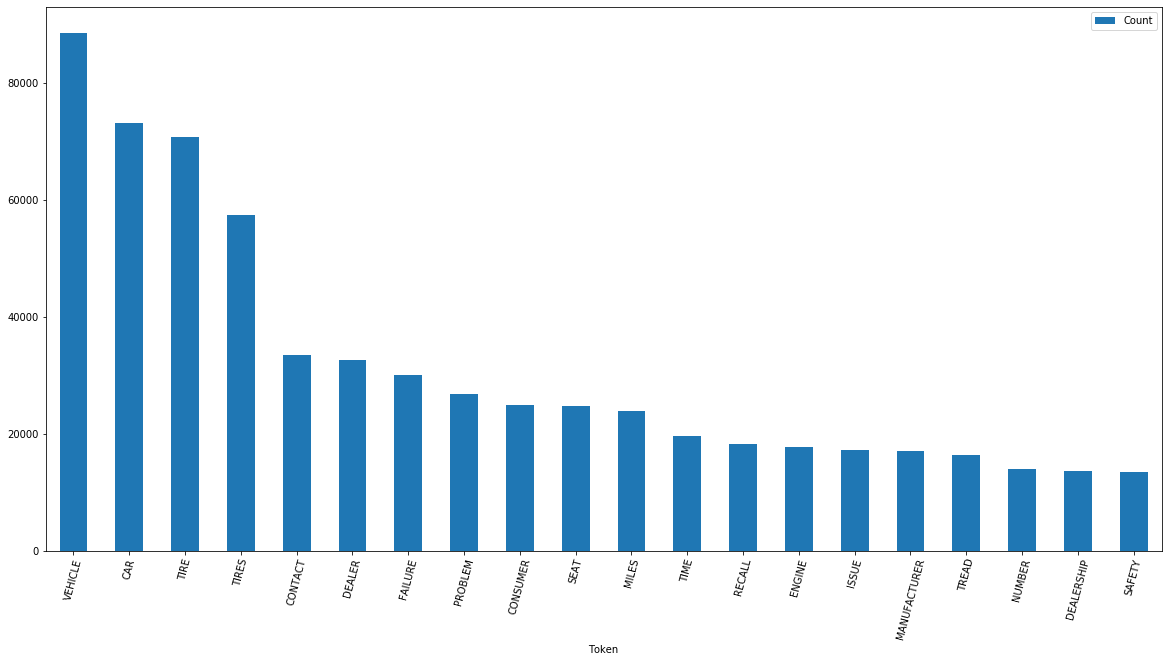

In [75]:
sqlcommand = 'SELECT top 20 TA_TOKEN, count(*) from "$TA_CDESCRIND" where TA_TYPE=\'noun\' group by TA_TOKEN order by count(*) desc'
generateWordCloud(sqlcommand)
generateBarChart(sqlcommand)


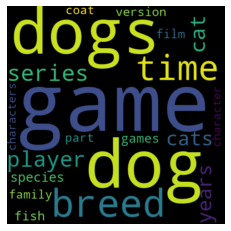

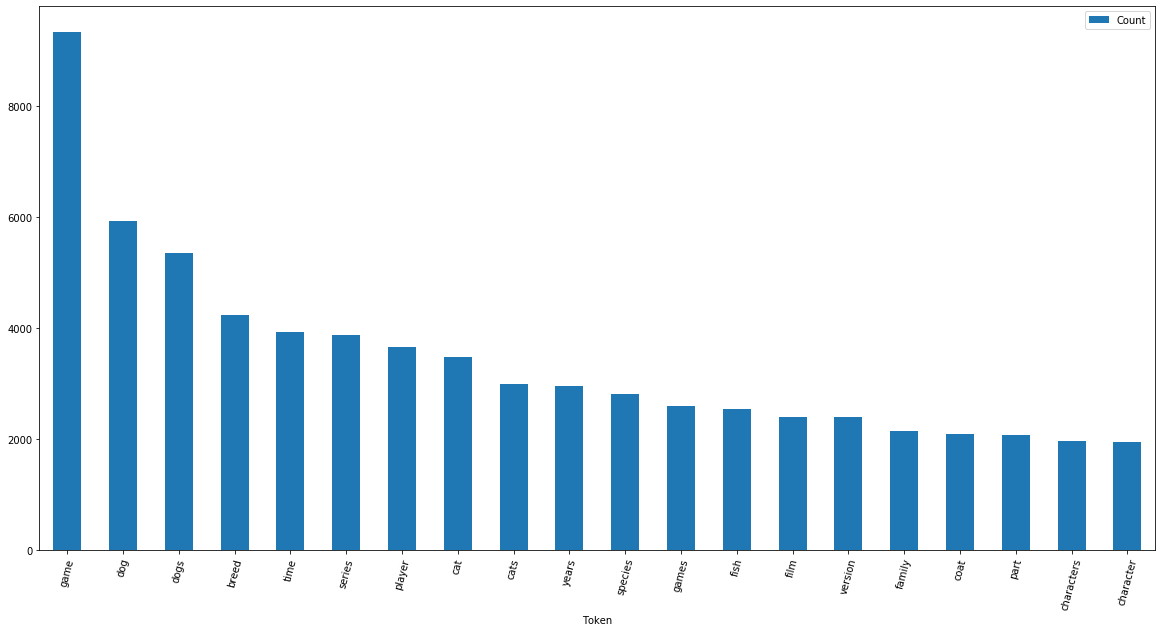

In [76]:
sqlcommand = 'SELECT top 20 TA_TOKEN, count(*) from "$TA_WIKIINDEX" where TA_TYPE=\'noun\' group by TA_TOKEN order by count(*) desc'
generateWordCloud(sqlcommand)
generateBarChart(sqlcommand)

Most used Words:


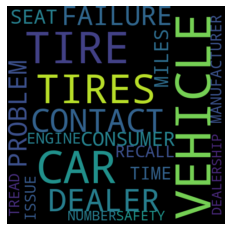

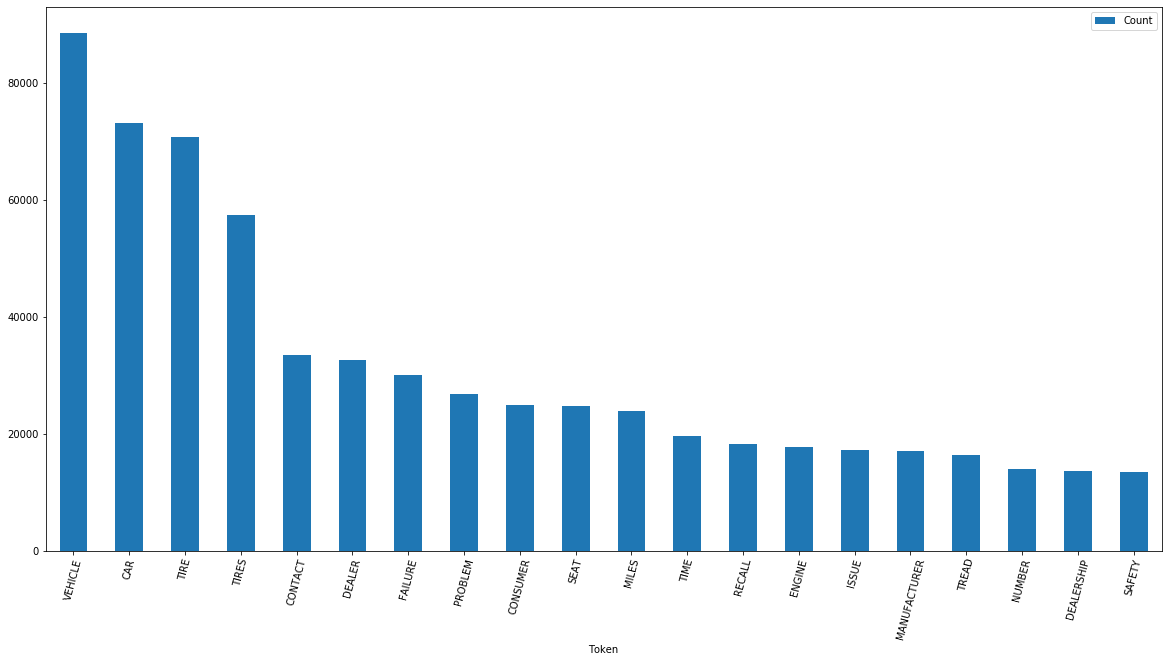

In [79]:
print("Most used Words:")
sqlcommand = 'SELECT TOP 20 TA_TOKEN, sum(NUMBEROFTOKENS) AS CountTokens FROM WORTCOUNTERTABLE GROUP BY TA_TOKEN ORDER BY CountTokens DESC;'
generateWordCloud(sqlcommand)
generateBarChart(sqlcommand)



Least used Words:


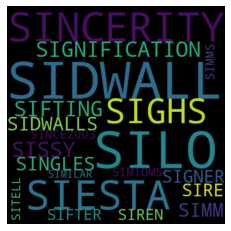

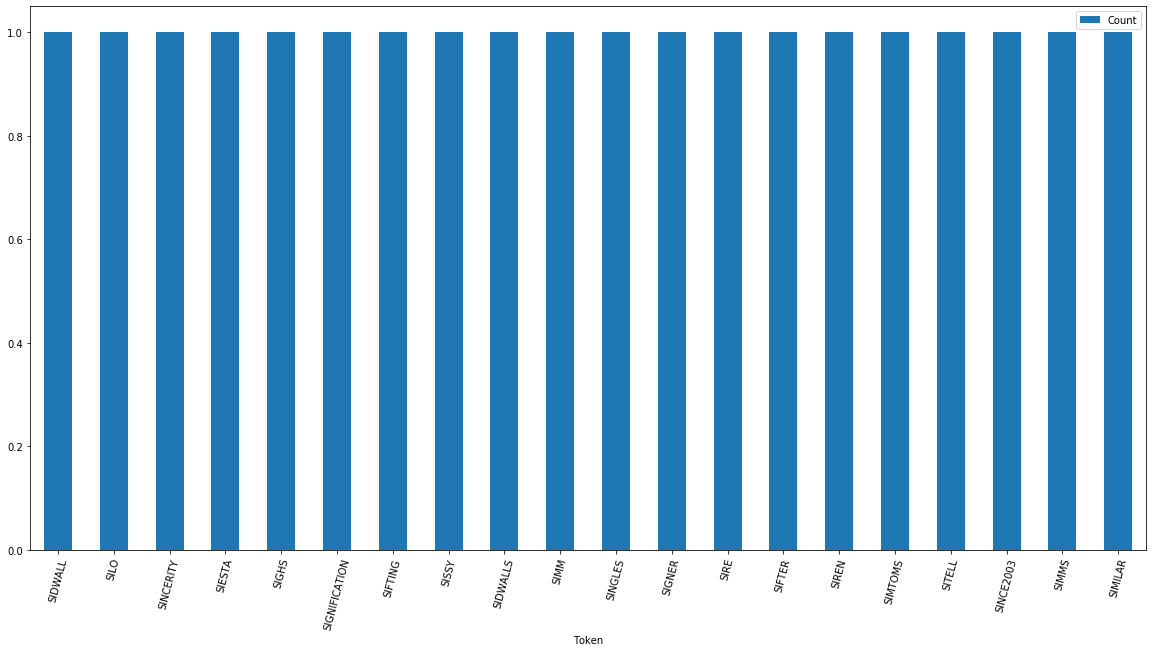

In [80]:
print("Least used Words:")
sqlcommand = 'SELECT TOP 20 TA_TOKEN, sum(NUMBEROFTOKENS) AS CountTokens FROM WORTCOUNTERTABLE GROUP BY TA_TOKEN ORDER BY CountTokens ASC;'
generateWordCloud(sqlcommand)
generateBarChart(sqlcommand)



Most used Nouns:


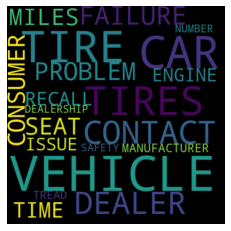

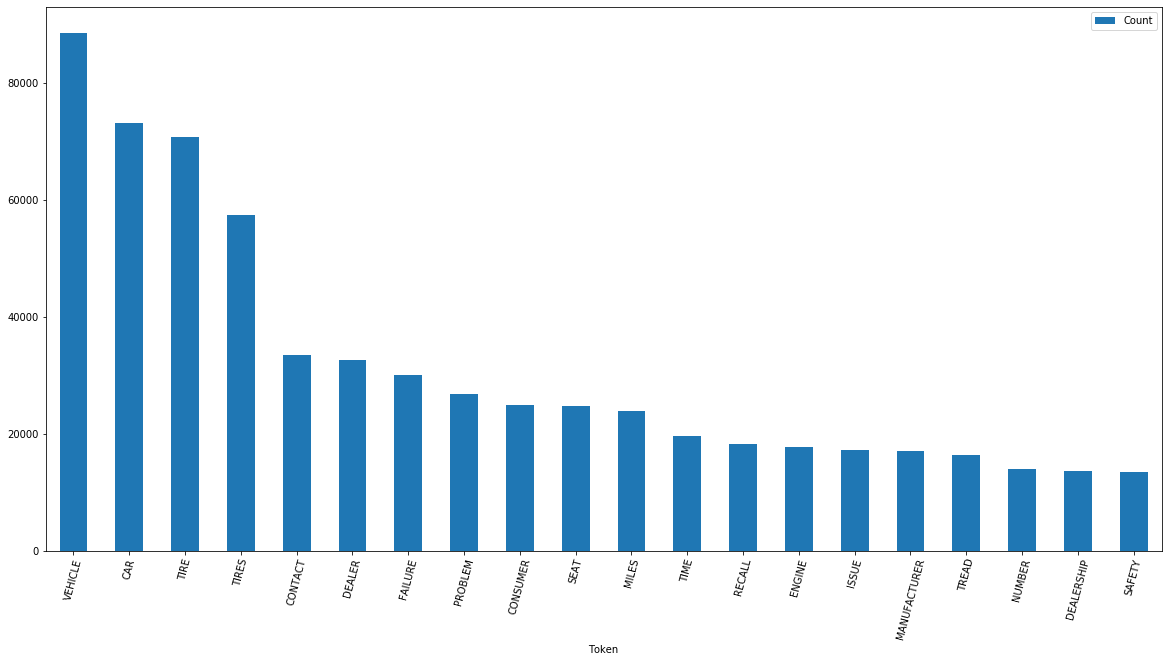

In [81]:
print("Most used Nouns:")
sqlcommand = 'SELECT TOP 20 TA_TOKEN, count(*) as CountTokens FROM "$TA_CDESCRIND" as t WHERE t.TA_TYPE = \'noun\' GROUP BY t.TA_TOKEN ORDER BY CountTokens DESC;'
generateWordCloud(sqlcommand)
generateBarChart(sqlcommand)



Most used verbs:


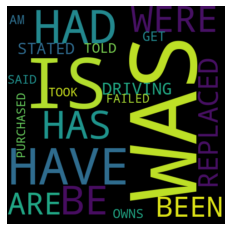

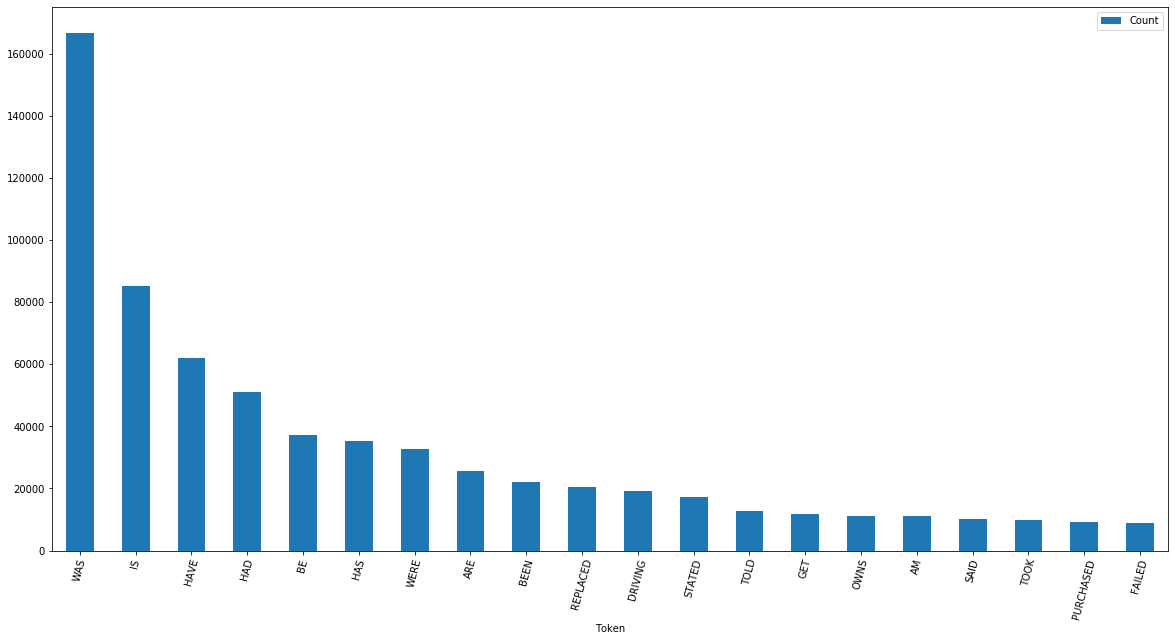

In [82]:
print("Most used verbs:")
sqlcommand = 'SELECT TOP 20 TA_TOKEN, count(*) as CountTokens FROM "$TA_CDESCRIND" as t WHERE t.TA_TYPE = \'verb\' GROUP BY t.TA_TOKEN ORDER BY CountTokens DESC;'
generateWordCloud(sqlcommand)
generateBarChart(sqlcommand)



Most used adjectives:


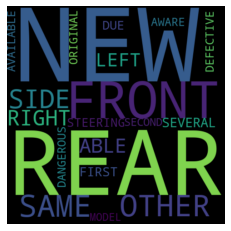

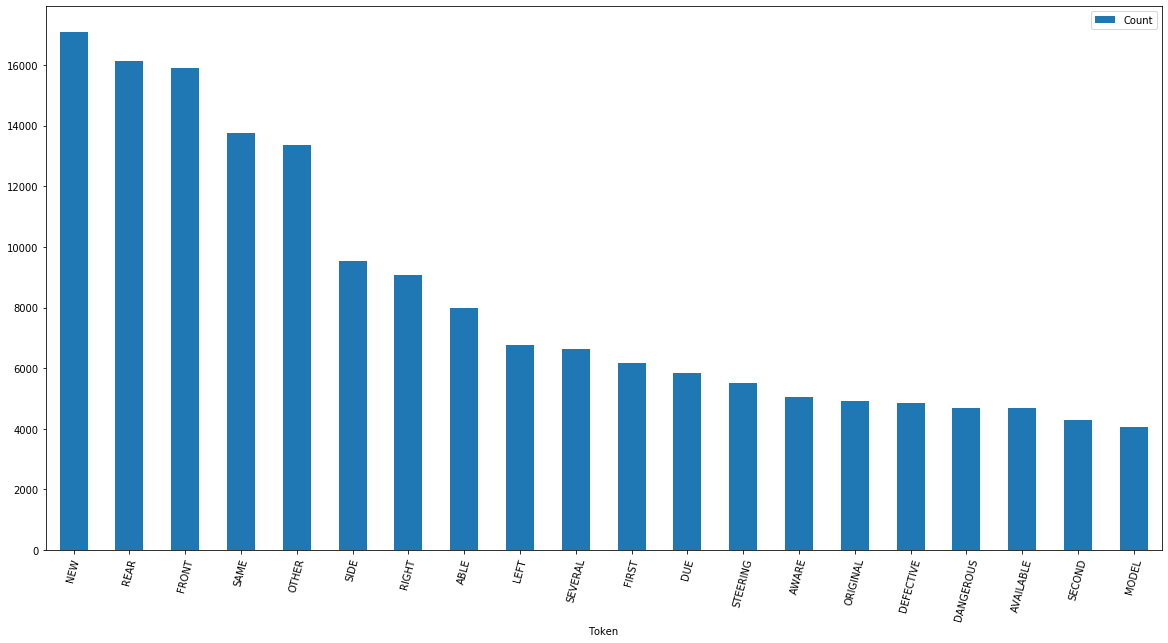

In [83]:
print("Most used adjectives:")
sqlcommand = 'SELECT TOP 20 TA_TOKEN, count(*) as CountTokens FROM "$TA_CDESCRIND" as t WHERE t.TA_TYPE = \'adjective\' GROUP BY t.TA_TOKEN ORDER BY CountTokens DESC;'
generateWordCloud(sqlcommand)
generateBarChart(sqlcommand)

### Und für Wiki

Most used adjectives:


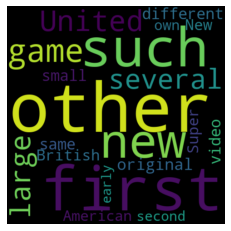

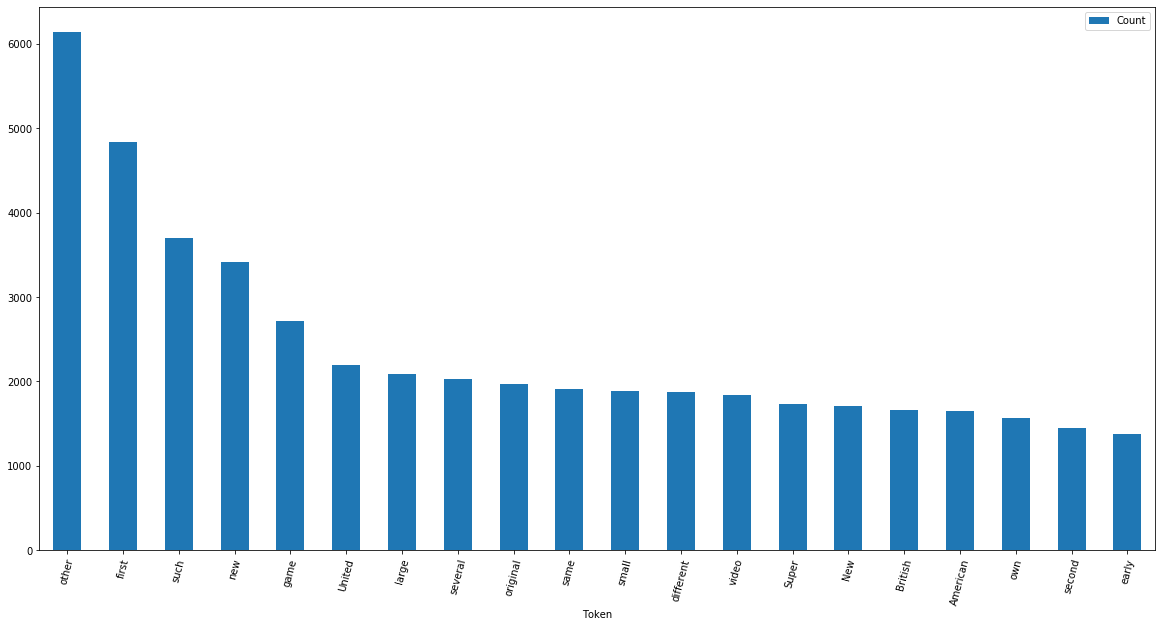

In [84]:
print("Most used adjectives:")
sqlcommand = 'SELECT TOP 20 TA_TOKEN, count(*) as CountTokens FROM "$TA_WIKIINDEX" as t WHERE t.TA_TYPE = \'adjective\' GROUP BY t.TA_TOKEN ORDER BY CountTokens DESC;'
generateWordCloud(sqlcommand)
generateBarChart(sqlcommand)